In [2]:
!pip install adversarial-robustness-toolbox

from sklearn.linear_model import LogisticRegression

import numpy as np
from matplotlib import pyplot as plt

from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import ProjectedGradientDescent
from art.utils import load_mnist


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.6 MB/s eta 0:00:00


In [3]:
(x_train, y_train), (x_test, y_test), min_, max_ = load_mnist()

n_samples_train = x_train.shape[0]
n_features_train = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]
n_samples_test = x_test.shape[0]
n_features_test = x_test.shape[1] * x_test.shape[2] * x_test.shape[3]

x_train = x_train.reshape(n_samples_train, n_features_train)
x_test = x_test.reshape(n_samples_test, n_features_test)

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

n_samples_max = 100
x_train = x_train[0:n_samples_max]
y_train = y_train[0:n_samples_max]
x_test = x_test[0:n_samples_max]
y_test = y_test[0:n_samples_max]

In [4]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                           class_weight='balanced', random_state=None, solver='lbfgs', max_iter=100, 
                           multi_class='ovr', verbose=0, warm_start=False, n_jobs=None)
model.fit(X=x_train, y=y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr')

In [6]:
art_classifier = SklearnClassifier(model=model)

In [7]:
pgd = ProjectedGradientDescent(estimator=art_classifier, norm=np.inf, eps=.3, eps_step=0.1, max_iter=20, 
                               targeted=False, num_random_init=0, batch_size=128)

In [8]:
x_train_adv = pgd.generate(x_train)

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

In [9]:
x_test_adv = pgd.generate(x_test)

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

In [10]:
score = model.score(x_train, y_train)
print("Benign Training Score: %.4f" % score)

Benign Training Score: 1.0000


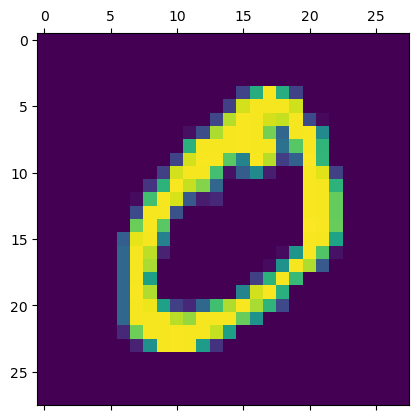

In [26]:
plt.matshow(x_train[1, :].reshape((28, 28)))
#plt.clim(0, 1)

In [23]:
prediction = model.predict(x_train[0:1, :])[0]
print("Benign Training Predicted Label: %i" % prediction)

Benign Training Predicted Label: 5


In [24]:
score = model.score(x_train_adv, y_train)
print("Adversarial Training Score: %.4f" % score)

Adversarial Training Score: 0.0000


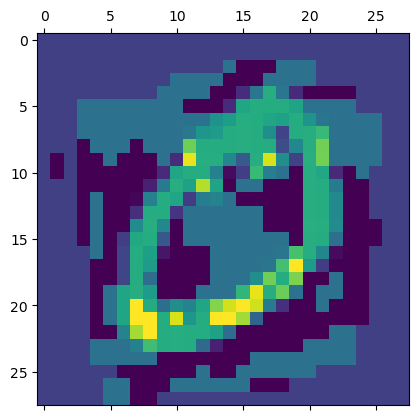

In [27]:
plt.matshow(x_train_adv[1, :].reshape((28, 28)))
#plt.clim(0, 1)

In [28]:
prediction = model.predict(x_train_adv[0:1, :])[0]
print("Adversarial Training Predicted Label: %i" % prediction)

Adversarial Training Predicted Label: 3


In [29]:
score = model.score(x_test, y_test)
print("Benign Test Score: %.4f" % score)

Benign Test Score: 0.7000


In [30]:
pgd = ProjectedGradientDescent(estimator=art_classifier, norm=np.inf, eps=0.5, eps_step=0.01, max_iter=50, 
                               targeted=True, num_random_init=3, batch_size=128)
y_test_target = np.zeros((y_test.shape[0], 10))
target_label = 7
y_test_target[:, target_label] = 1
x_test_adv = pgd.generate(x_test, y=y_test_target)
score = model.score(x_test_adv, y_test)

PGD - Random Initializations:   0%|          | 0/3 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/50 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/50 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/50 [00:00<?, ?it/s]

In [31]:
score = model.score(x_test_adv, np.argmax(y_test_target, axis=1))
print("Targeted Adversarial Test Score: %.4f" % score)

Targeted Adversarial Test Score: 1.0000


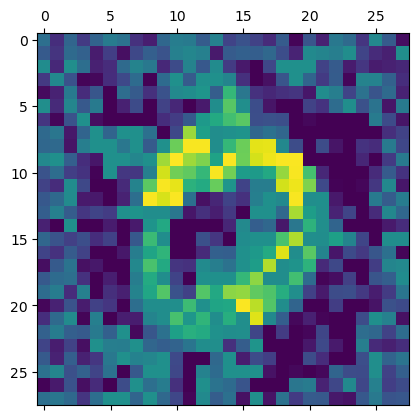

In [40]:
plt.matshow(x_test_adv[3, :].reshape((28, 28)))

In [41]:
prediction = model.predict(x_test_adv[16:17, :])[0]
print("Target Label: %i" % target_label)
print("Predicted Label: %i" % prediction)

Target Label: 7
Predicted Label: 7
